## ## Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.##

## Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.##

## The data consists of those diagnosed with Parkinson Disease and those who do not.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
%matplotlib inline
from numpy import loadtxt
from urllib.request import urlopen

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB

##from mlxtend.feature_selection import SequentialFeatureSelector as sfs
##from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
##from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
#Model selection Library
from sklearn import model_selection

import math

import warnings
warnings.filterwarnings('ignore')

In [3]:
park_df = pd.read_csv('parkinsons.data')

In [7]:
park_df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [8]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [11]:
park_df.shape

(195, 24)

In [12]:
park_df.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

## Spread 1 has all negetive values and all frequency related attributes has high std deviation 

In [14]:
park_df.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

In [15]:
park_df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?##

In [16]:
#Checking values stored in the dataframe
for column in park_df.columns:
    print("FEATURE NAME & VALUES = %s - %s"%(column, park_df[column].unique()[:10]))

FEATURE NAME & VALUES = name - ['phon_R01_S01_1' 'phon_R01_S01_2' 'phon_R01_S01_3' 'phon_R01_S01_4'
 'phon_R01_S01_5' 'phon_R01_S01_6' 'phon_R01_S02_1' 'phon_R01_S02_2'
 'phon_R01_S02_3' 'phon_R01_S02_4']
FEATURE NAME & VALUES = MDVP:Fo(Hz) - [119.992 122.4   116.682 116.676 116.014 120.552 120.267 107.332  95.73
  95.056]
FEATURE NAME & VALUES = MDVP:Fhi(Hz) - [157.302 148.65  131.111 137.871 141.781 131.162 137.244 113.84  132.068
 120.103]
FEATURE NAME & VALUES = MDVP:Flo(Hz) - [ 74.997 113.819 111.555 111.366 110.655 113.787 114.82  104.315  91.754
  91.226]
FEATURE NAME & VALUES = MDVP:Jitter(%) - [0.00784 0.00968 0.0105  0.00997 0.01284 0.00333 0.0029  0.00551 0.00532
 0.00505]
FEATURE NAME & VALUES = MDVP:Jitter(Abs) - [7.0e-05 8.0e-05 9.0e-05 1.1e-04 3.0e-05 6.0e-05 2.0e-05 4.0e-05 5.0e-05
 1.0e-05]
FEATURE NAME & VALUES = MDVP:RAP - [0.0037  0.00465 0.00544 0.00502 0.00655 0.00463 0.00155 0.00144 0.00293
 0.00268]
FEATURE NAME & VALUES = MDVP:PPQ - [0.00554 0.00696 0.00781 0.0

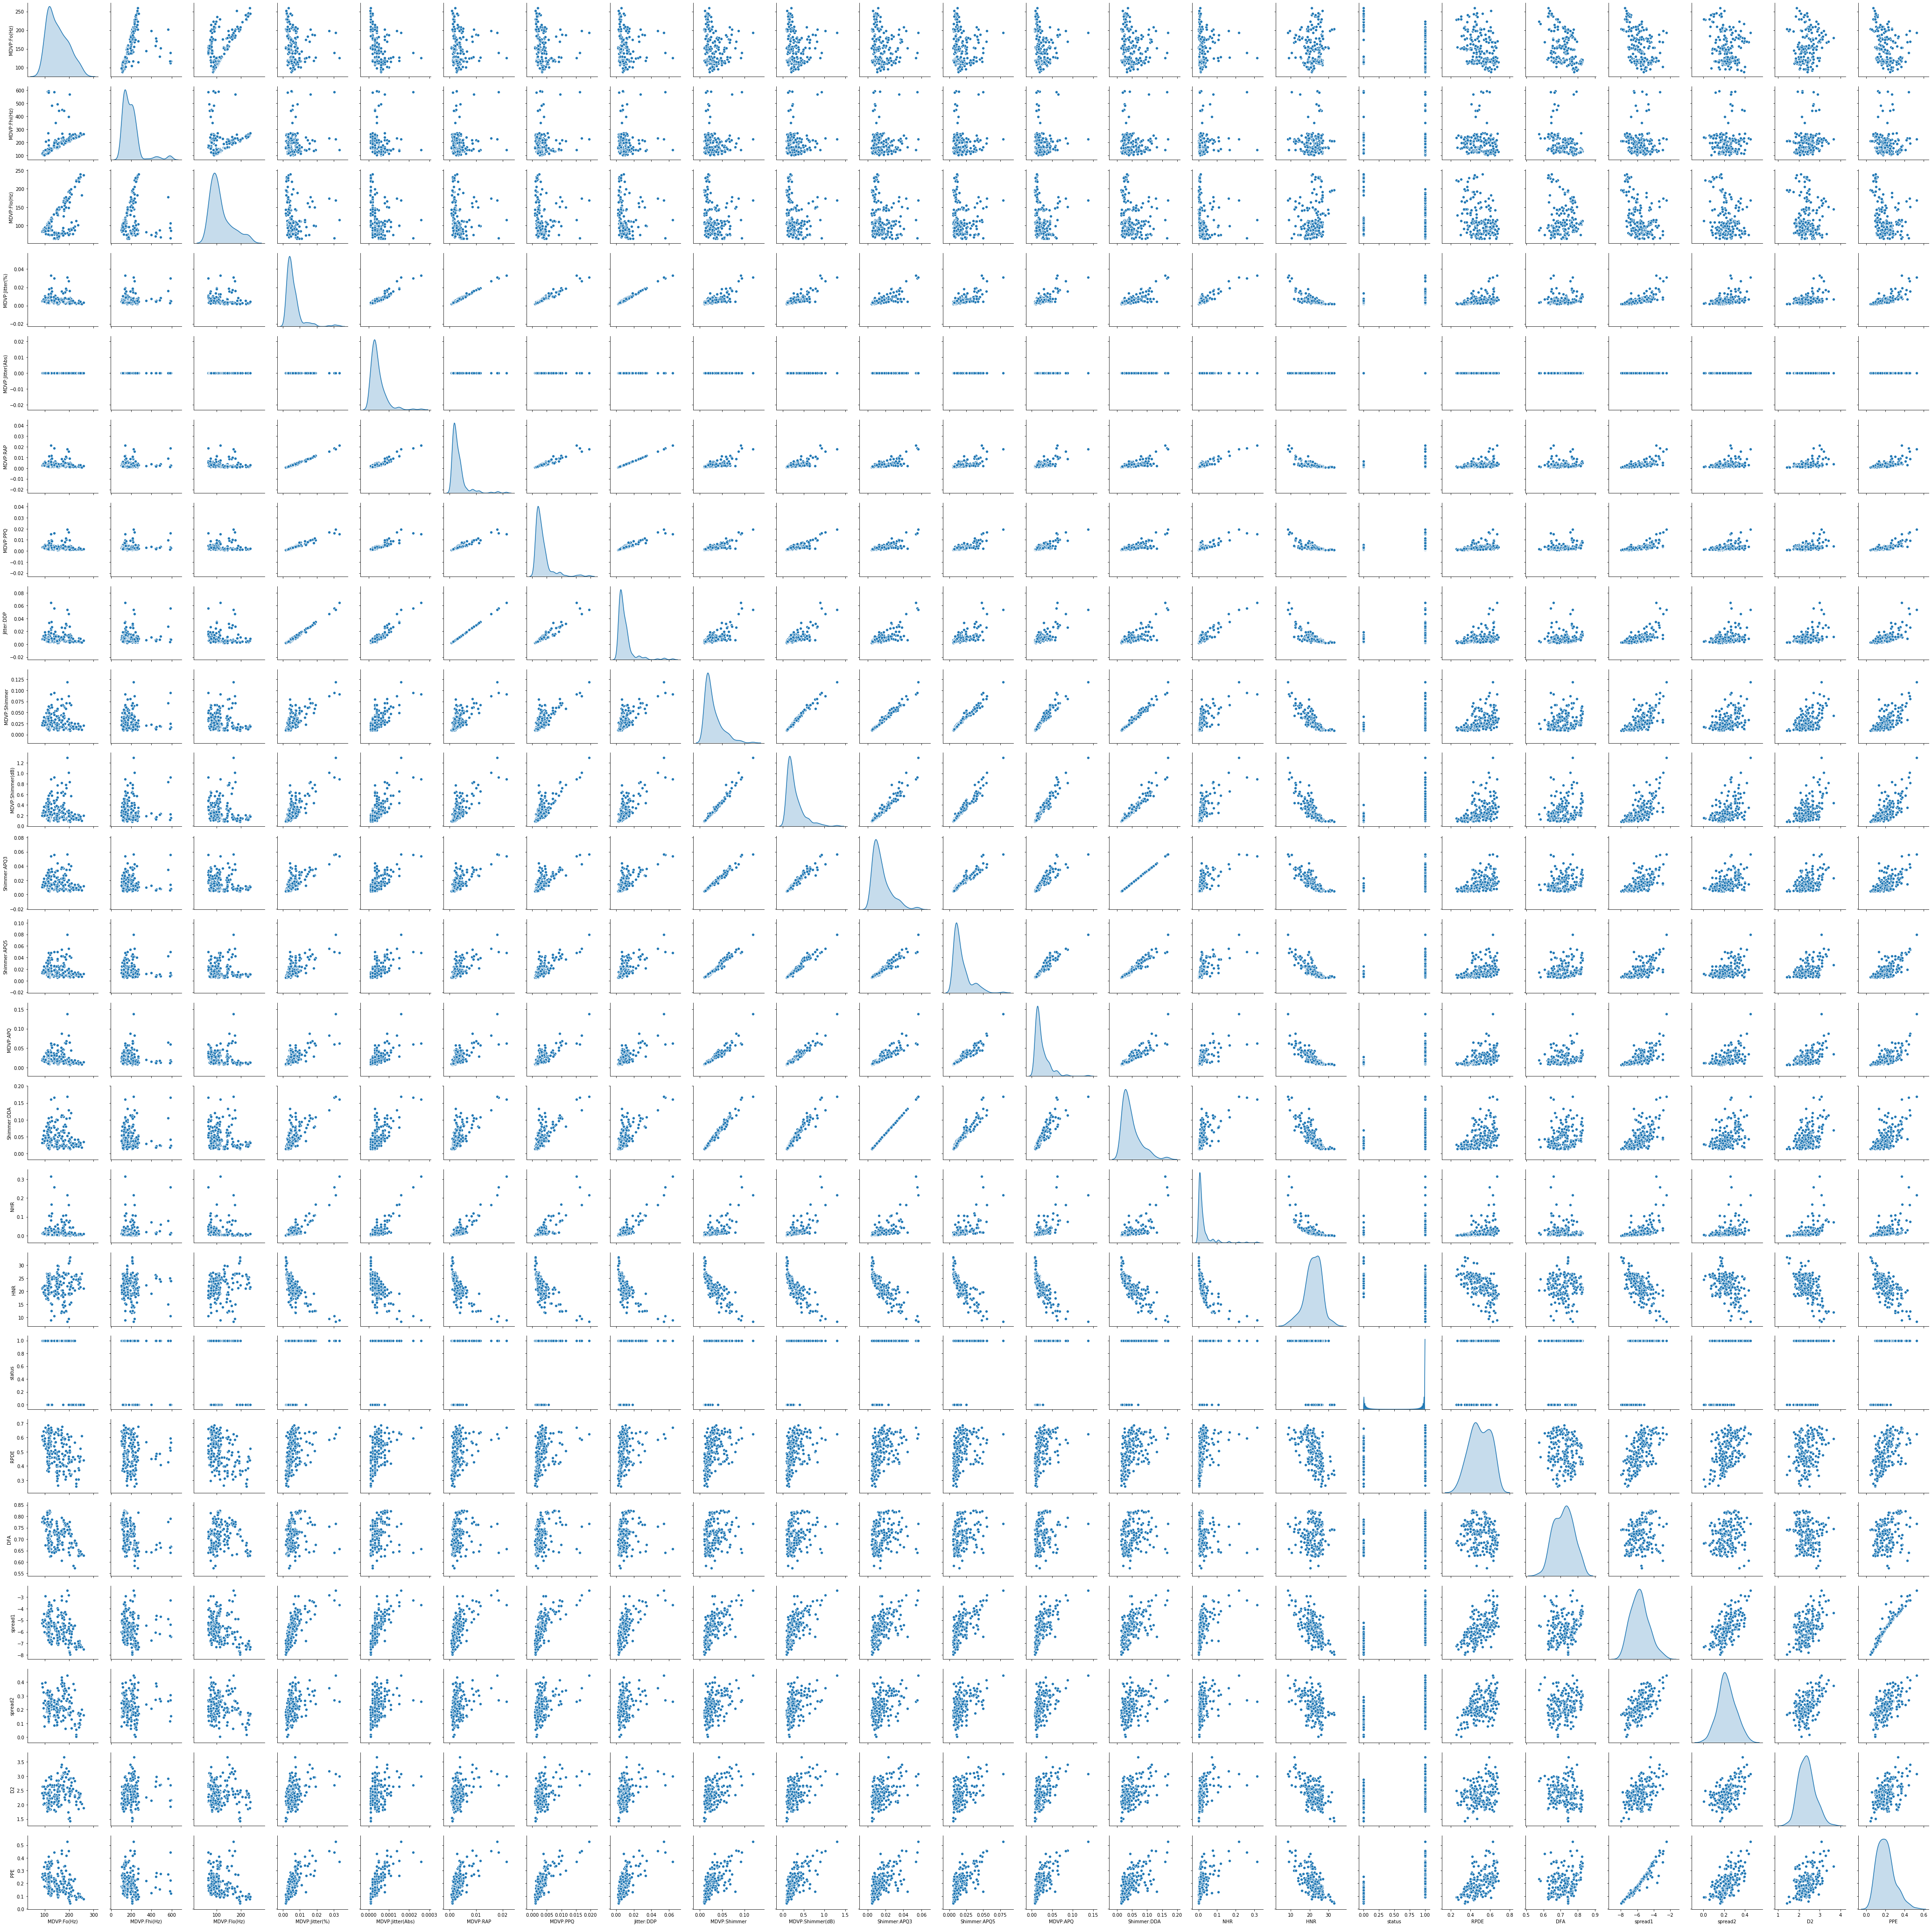

In [17]:
import matplotlib.pyplot as plt
plt.show()
sns.pairplot(park_df,diag_kind='kde')

In [18]:
park_df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

## HNR - Two measures of ratio of noise to tonal components in the voice, status - Health status of the subject (one) - Parkinson's, RPDE - D2 - Two nonlinear dynamical complexity measures, DFA - Signal fractal scaling exponent are negatively skewed and all most of features have value greater than 1. Normal skewed data range lies between -0.5 to 0.5 ##

## We need to check individual distribution plots for these features.Refer to below individual plots 

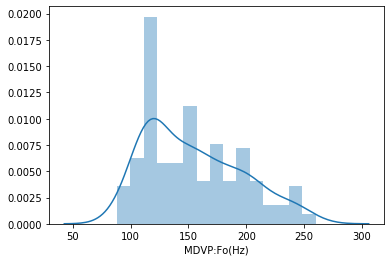

In [19]:
sns.distplot(park_df['MDVP:Fo(Hz)'],bins=15)

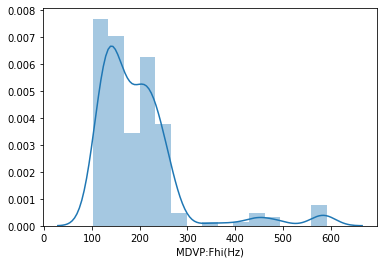

In [20]:
sns.distplot(park_df['MDVP:Fhi(Hz)'],bins=15)

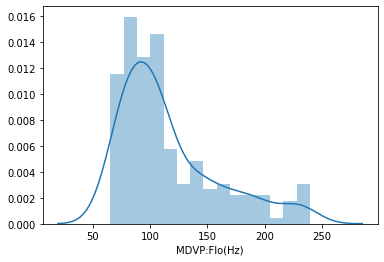

In [22]:
sns.distplot(park_df['MDVP:Flo(Hz)'],bins=15)

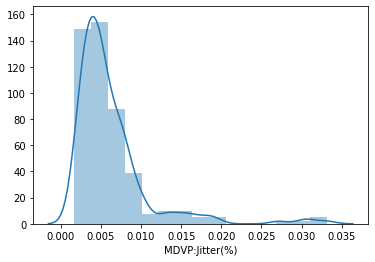

In [23]:
sns.distplot(park_df['MDVP:Jitter(%)'],bins=15)

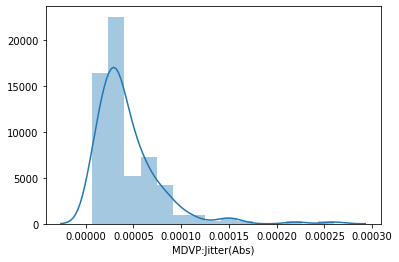

In [24]:
sns.distplot(park_df['MDVP:Jitter(Abs)'],bins=15)

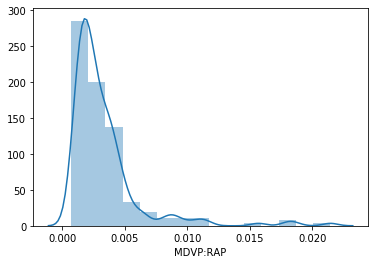

In [25]:
sns.distplot(park_df['MDVP:RAP'],bins=15)

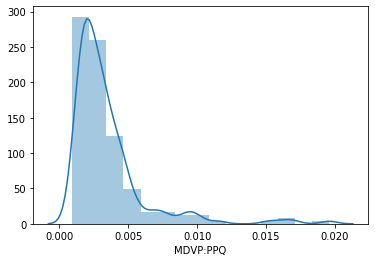

In [26]:
sns.distplot(park_df['MDVP:PPQ'],bins=15)

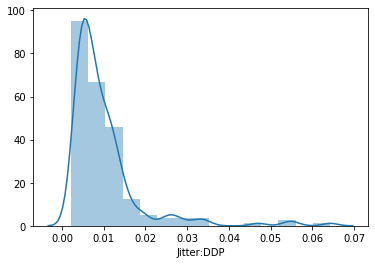

In [27]:
sns.distplot(park_df['Jitter:DDP'],bins=15)

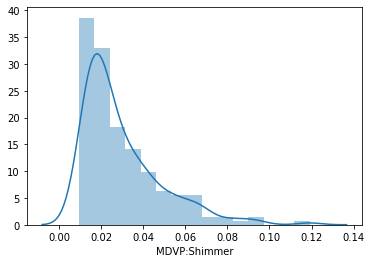

In [28]:
sns.distplot(park_df['MDVP:Shimmer'],bins=15)

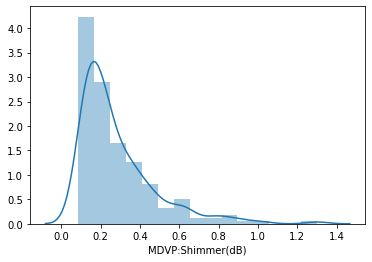

In [29]:
sns.distplot(park_df['MDVP:Shimmer(dB)'],bins=15)

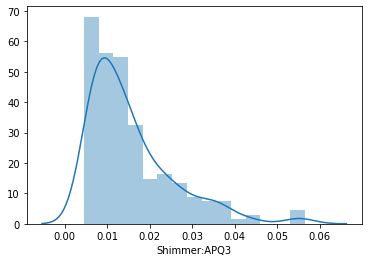

In [31]:
sns.distplot(park_df['Shimmer:APQ3'],bins=15)

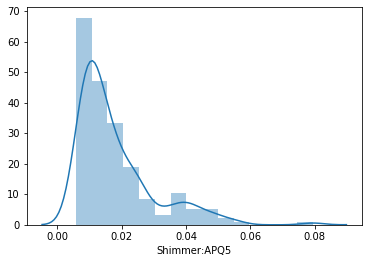

In [32]:
sns.distplot(park_df['Shimmer:APQ5'],bins=15)

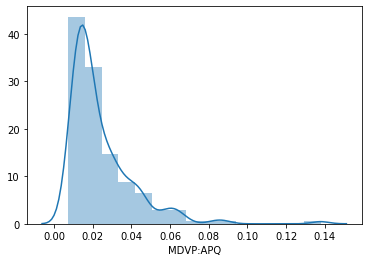

In [33]:
sns.distplot(park_df['MDVP:APQ'],bins=15)

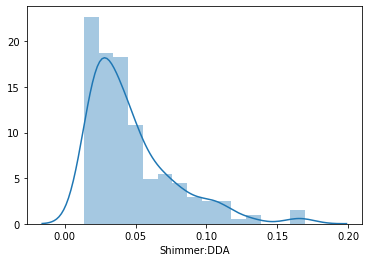

In [34]:
sns.distplot(park_df['Shimmer:DDA'],bins=15)

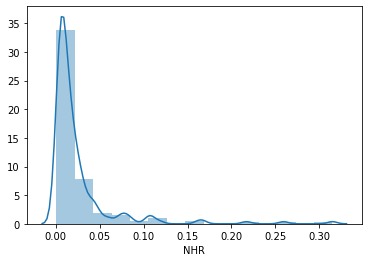

In [35]:
sns.distplot(park_df['NHR'],bins=15)

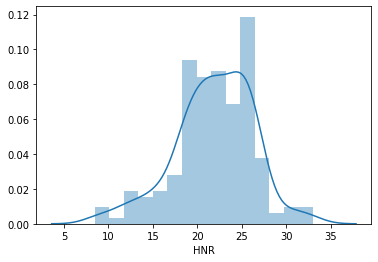

In [36]:
sns.distplot(park_df['HNR'],bins=15)

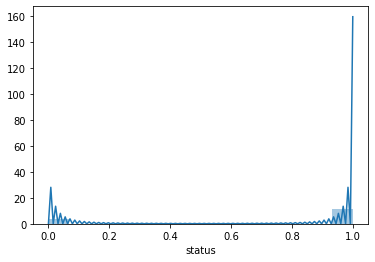

In [37]:
sns.distplot(park_df['status'],bins=15)

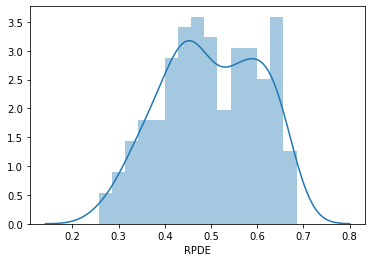

In [38]:
sns.distplot(park_df['RPDE'],bins=15)

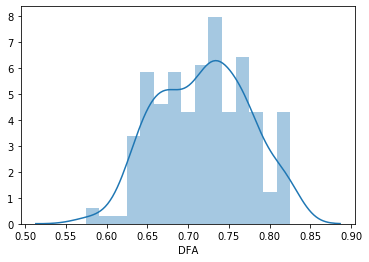

In [39]:
sns.distplot(park_df['DFA'],bins=15)

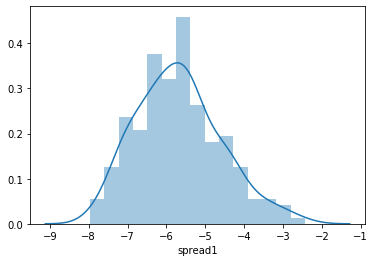

In [40]:
sns.distplot(park_df['spread1'],bins=15)

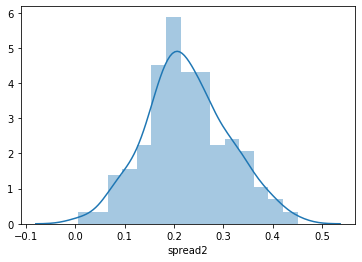

In [41]:
sns.distplot(park_df['spread2'],bins=15)

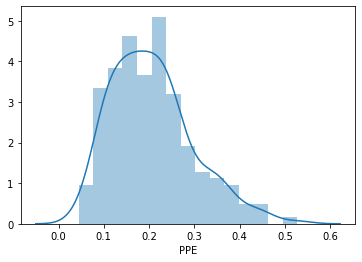

In [67]:
sns.distplot(park_df['PPE'],bins=15)

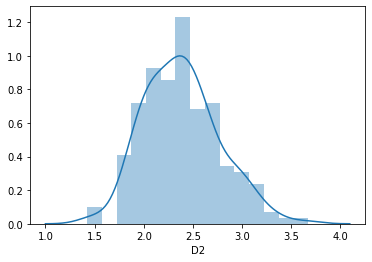

In [69]:
sns.distplot(park_df['D2'],bins=15)

In [70]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [71]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
names = ['MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','spread1','spread2','D2','PPE']
array = park_df.values
X = array[:,1:18]
Y = array[:,23]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:23,:])
park_df = pandas.read_csv('parkinsons.data', names=names)


ValueError: Unknown label type: (array([0.284654, 0.368674, 0.33263400000000004, 0.368975,
       0.41033500000000006, 0.357775, 0.211756, 0.16375499999999998,
       0.231571, 0.271362, 0.24974000000000002, 0.275931, 0.138512,
       0.199889, 0.1701, 0.234589, 0.218164, 0.430788, 0.377429,
       0.32211100000000004, 0.36539099999999997, 0.259765, 0.285695,
       0.253556, 0.21596100000000001, 0.219514, 0.147403, 0.162999,
       0.10851400000000001, 0.135242, 0.085569, 0.06850099999999999,
       0.09632, 0.056140999999999996, 0.044538999999999995, 0.05761,
       0.165827, 0.173218, 0.141929, 0.160691, 0.130554, 0.11573,
       0.095032, 0.117399, 0.09147000000000001, 0.10270599999999999,
       0.097336, 0.086398, 0.133867, 0.12887200000000001,
       0.10356099999999999, 0.105993, 0.119308, 0.147491, 0.3167,
       0.34483400000000003, 0.335041, 0.31446399999999997,
       0.32619699999999996, 0.316395, 0.101516, 0.09855499999999999,
       0.103224, 0.093534, 0.073581, 0.091546, 0.226156,
       0.22624699999999998, 0.18558, 0.141958, 0.180828, 0.242981,
       0.18818, 0.22546100000000002, 0.24451199999999998,
       0.22862399999999997, 0.193918, 0.232744, 0.260015,
       0.27794800000000003, 0.32797800000000005, 0.260633, 0.264666,
       0.177275, 0.242119, 0.200423, 0.14461400000000002,
       0.22096799999999997, 0.194052, 0.332086, 0.301952,
       0.13412000000000002, 0.18648900000000002, 0.16080899999999998,
       0.16081199999999998, 0.164916, 0.15170899999999998, 0.340623,
       0.260375, 0.378483, 0.370961, 0.356881, 0.444774, 0.113942,
       0.093193, 0.11287799999999999, 0.106802, 0.105306, 0.11513,
       0.185668, 0.23251999999999998, 0.13639, 0.268144, 0.177807,
       0.115515, 0.274407, 0.170106, 0.28278000000000003, 0.251972,
       0.22065700000000002, 0.152428, 0.23480900000000002, 0.229892,
       0.215558, 0.181988, 0.222716, 0.214075, 0.196535, 0.112856,
       0.183572, 0.169923, 0.17063299999999998, 0.23220900000000003,
       0.141422, 0.24308000000000002, 0.228319, 0.25945100000000004,
       0.274387, 0.209191, 0.18498499999999998, 0.277227, 0.231723,
       0.20986300000000002, 0.189032, 0.159777, 0.232861,
       0.45753299999999997, 0.33608499999999997, 0.418646, 0.270173,
       0.301487, 0.527367, 0.454721, 0.16858099999999998, 0.247455,
       0.206256, 0.220546, 0.261305, 0.249703, 0.216638, 0.244948,
       0.238281, 0.22052, 0.21238600000000002, 0.367233, 0.119652,
       0.09160399999999999, 0.075587, 0.202879, 0.100881, 0.09622,
       0.160376, 0.174152, 0.179677, 0.163118, 0.184067, 0.174429,
       0.132703, 0.160306, 0.19272999999999998, 0.14410499999999998,
       0.19771, 0.156368, 0.21572399999999997, 0.252404, 0.214346,
       0.12060499999999999, 0.13886800000000002, 0.121777,
       0.11283800000000001, 0.13305, 0.16889500000000002,
       0.13172799999999998, 0.123306, 0.148569], dtype=object),)

## Bi Variate Analysis

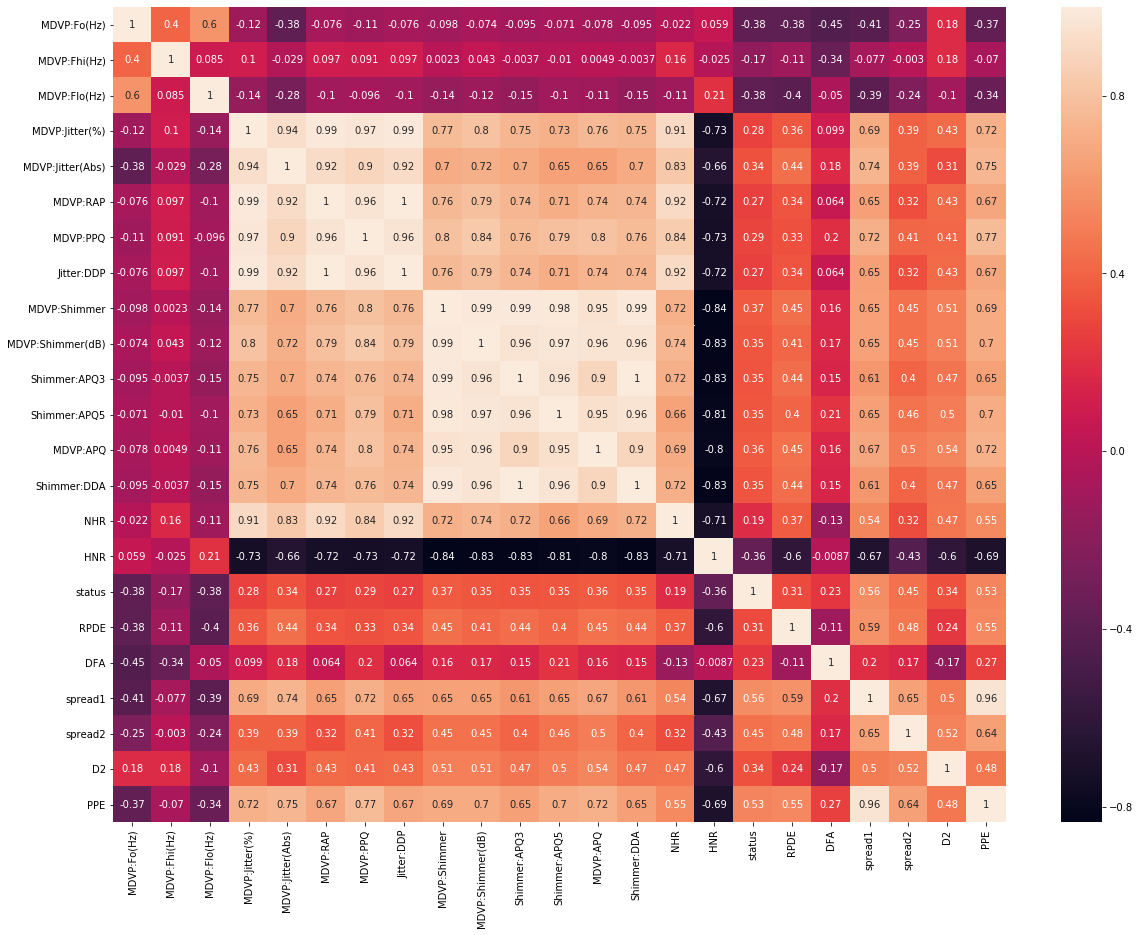

In [74]:
plt.figure(figsize=(20, 15))

park_df_corr = park_df.corr()
sns.heatmap(park_df_corr, xticklabels = park_df_corr.columns.values,yticklabels = park_df_corr.columns.values,annot = True);

In [ ]:
##Finding Correlation

In [75]:
def corrank(X):
    import itertools
    park_df1 = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in 
                       list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
    print(park_df1.sort_values(by='corr',ascending=False))
corrank(park_df)

                                  pairs      corr
177         (Shimmer:APQ3, Shimmer:DDA)  1.000000
101              (MDVP:RAP, Jitter:DDP)  1.000000
66         (MDVP:Jitter(%), Jitter:DDP)  0.990276
64           (MDVP:Jitter(%), MDVP:RAP)  0.990276
152         (MDVP:Shimmer, Shimmer:DDA)  0.987626
149        (MDVP:Shimmer, Shimmer:APQ3)  0.987625
148    (MDVP:Shimmer, MDVP:Shimmer(dB))  0.987258
150        (MDVP:Shimmer, Shimmer:APQ5)  0.982835
65           (MDVP:Jitter(%), MDVP:PPQ)  0.974256
163    (MDVP:Shimmer(dB), Shimmer:APQ5)  0.973751
165     (MDVP:Shimmer(dB), Shimmer:DDA)  0.963202
162    (MDVP:Shimmer(dB), Shimmer:APQ3)  0.963198
249                      (spread1, PPE)  0.962435
164        (MDVP:Shimmer(dB), MDVP:APQ)  0.960977
188         (Shimmer:APQ5, Shimmer:DDA)  0.960072
175        (Shimmer:APQ3, Shimmer:APQ5)  0.960070
117              (MDVP:PPQ, Jitter:DDP)  0.957319
100                (MDVP:RAP, MDVP:PPQ)  0.957317
151            (MDVP:Shimmer, MDVP:APQ)  0.950083


## Total 253 coretaions are taken for each other attributes here some are having 100 percent corelation and some are less which is listed in the above tabel 

## (Shimmer:APQ3, Shimmer:DDA) and (MDVP:RAP, Jitter:DDP) are having 100 percent corelation. This results in Status as target attribute.

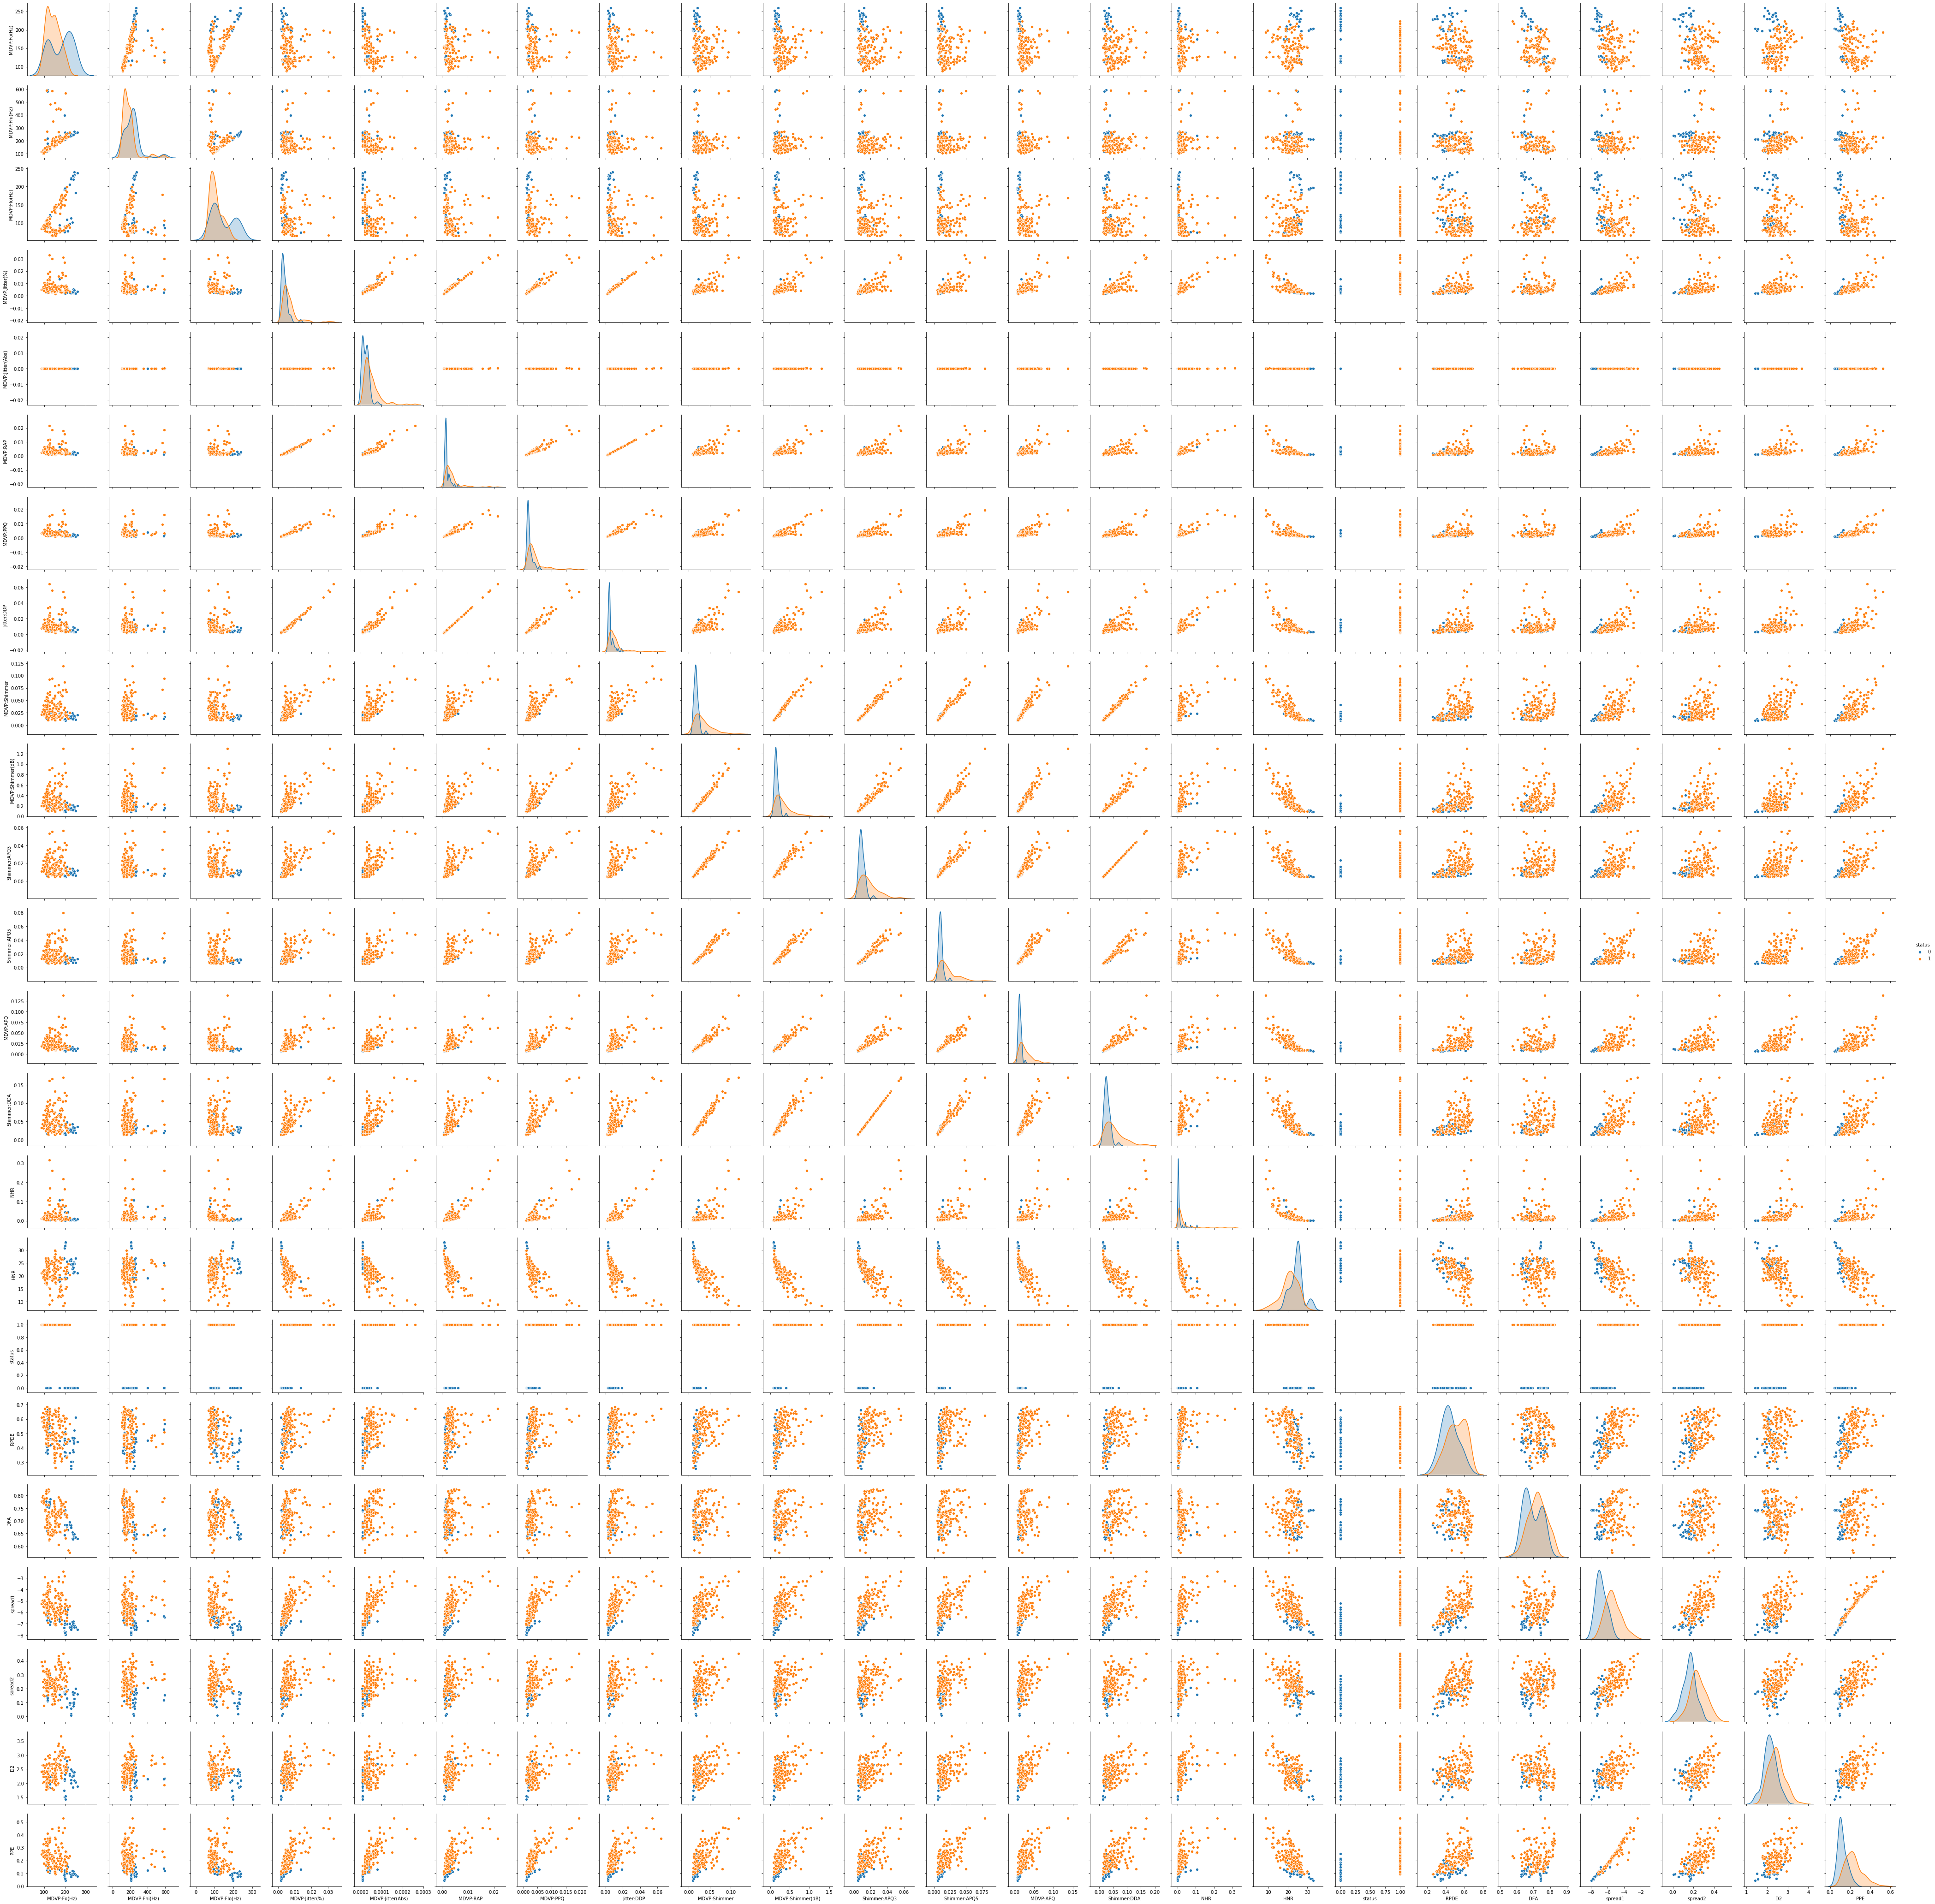

In [77]:
sns.pairplot(park_df,diag_kind='kde',hue='status')

In [79]:
#The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category or code.

for feature in park_df.columns: 
    if park_df[feature].dtype == 'object': 
        park_df[feature] = pd.Categorical(park_df[feature]).codes 

In [80]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null int16
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float

In [81]:
features = park_df.loc[:, park_df.columns != 'status'].values[:, 1:]
labels = park_df.loc[:, 'status'].values

scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(features)

# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  park_df.drop("status", axis=1)
y =  park_df.pop("status")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)


In [82]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
print("accuracy of the model for test data is : ",dt_model.score(test_set , test_labels))   

accuracy of the model for test data is :  0.9322033898305084


In [84]:
predicted_test_labels = dt_model.predict(test_set)

predicted_test_labels

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels,predicted_test_labels)
conf_matrix

array([[17,  2],
       [ 2, 38]], dtype=int64)

In [87]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
from sklearn.feature_extraction.text import CountVectorizer 
from IPython.display import Image  

from sklearn import tree
from os import system

train_char_label = ['1', '2', '3']
park_Tree_File = open('parkinsons_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=park_Tree_File, feature_names = list(train_set), class_names = list(train_char_label))

park_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                       Imp
name              0.367861
MDVP:Fo(Hz)       0.000000
MDVP:Fhi(Hz)      0.099800
MDVP:Flo(Hz)      0.102307
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.042768
PPE               0.387263


In [89]:
dt_model_reg = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
dt_model_reg.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
credit_tree_regularized = open('parkinsons_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model_reg, out_file= credit_tree_regularized , feature_names = list(train_set), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model_reg.feature_importances_, columns = ["Imp"], index = train_set.columns))

                       Imp
name              0.367861
MDVP:Fo(Hz)       0.000000
MDVP:Fhi(Hz)      0.099800
MDVP:Flo(Hz)      0.102307
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.042768
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.000000
PPE               0.387263


In [91]:
dt_model_reg.score(test_set , test_labels)

0.9322033898305084

In [ ]:
## Implimenting the decision tree using random forest and finding the obtimal number of tree for best results

In [92]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 10)
rfcl = rfcl.fit(train_set, train_labels)

test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.864406779661017

Estimator of 5 with the score: 0.847457627118644
Estimator of 10 with the score: 0.7966101694915254
Estimator of 15 with the score: 0.8983050847457628
Estimator of 20 with the score: 0.8813559322033898
Estimator of 25 with the score: 0.9152542372881356
Estimator of 30 with the score: 0.8983050847457628
Estimator of 35 with the score: 0.9491525423728814
Estimator of 40 with the score: 0.9322033898305084
Estimator of 45 with the score: 0.8813559322033898
Estimator of 50 with the score: 0.8983050847457628
Estimator of 55 with the score: 0.9152542372881356
Estimator of 60 with the score: 0.8813559322033898
Estimator of 65 with the score: 0.8983050847457628
Estimator of 70 with the score: 0.9491525423728814
Estimator of 75 with the score: 0.8813559322033898
Estimator of 80 with the score: 0.9322033898305084
Estimator of 85 with the score: 0.9322033898305084
Estimator of 90 with the score: 0.8983050847457628
Estimator of 95 with the score: 0.8983050847457628
Estimator for  [5, 10, 15, 20, 25

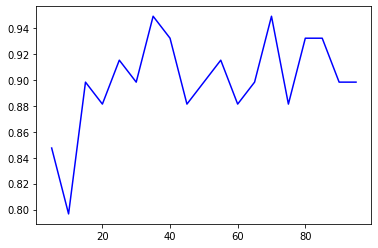

In [93]:
n_estimators = range(5, 100, 5)
a=[]
b=[]
for est in n_estimators:
    rfcl = RandomForestClassifier(n_estimators = est)
    rfcl = rfcl.fit(train_set, train_labels)
    test_pred = rfcl.predict(test_set)
    score =rfcl.score(test_set , test_labels)
    print("Estimator of %i with the score: %r" % (est, score))
    a.append(est)
    b.append(score)
    
print("Estimator for ",a)
print("Accuracy Score: ",b) 
plt.plot(a,b,'b') 
plt.show()

In [94]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=17, max_samples=.7)
#bgcl = BaggingClassifier(n_estimators=9 , max_samples=.7)
bgcl = bgcl.fit(train_set, train_labels)

test_pred = bgcl.predict(test_set)
print("Test accuracy: ",bgcl.score(test_set , test_labels))

Test accuracy:  0.9491525423728814


In [96]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 10)
abcl = abcl.fit(train_set, train_labels)

In [97]:
test_pred = abcl.predict(test_set)
print("Test accuracy: ",abcl.score(test_set , test_labels))

Test accuracy:  0.9491525423728814


In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 10, learning_rate = 0.05)
gbcl = gbcl.fit(train_set, train_labels)

In [99]:
test_pred = gbcl.predict(test_set)
print("Test accuracy: ",gbcl.score(test_set , test_labels))

Test accuracy:  0.8983050847457628
